<a href="https://colab.research.google.com/github/sarahJune1/BUS509_sachss/blob/main/notebooks/Module_11/Goodness_of_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats

# F Distribution

Using scipy package ppf

dfn denotes number of degrees of freedom that the estimate of variance used in the numerator.

dfd is the number of degrees of freedom that the estimate of variance used in the denominator.

### Example 11.5

a. P(F<sub>(7,10)</sub> ≥ x) = 0.025

b. P(F<sub>(7,10)</sub> < x) = 0.05

In [ ]:
# calculate the critical value
upper_tail_prob = 0.025
dfn = 7
dfd = 10

In [ ]:
critical_value = stats.f.ppf(q=1-upper_tail_prob, dfn=dfn, dfd=dfd)

critical_value

3.9498240689393143

In [ ]:
# lower the degrees of freedom, the larger the value of F needs to be significant

In [ ]:
stats.f.cdf(critical_value, dfn=dfn, dfd=dfd)

0.975

Notice the lower vs. upper tail probability

In [ ]:
# calculate the critical value
lower_tail_prob = 0.05
dfn = 7
dfd = 10

In [ ]:
# don't need to subtract from 1
critical_value = stats.f.ppf(q=lower_tail_prob, dfn=dfn, dfd=dfd)

In [ ]:
critical_value

0.2749879395314314

In [ ]:
stats.f.cdf(critical_value, dfn=dfn, dfd=dfd)

0.050000000000000024

Now we can make statistical inferences about the ratio of two population variances with confidence intervals.

In [ ]:
# define inputs
alpha = .05
n1 = 11
n2 = 16
s1 = 182.25
s2 = 457.96

Look into differences of dividing by 1 vs. subtracting by 1.

In [ ]:
upper_crit = 1/stats.f.ppf(q=alpha/2, dfn=n1-1, dfd=n2-1)
lower_crit = stats.f.ppf(q=alpha/2, dfn=n1-1, dfd=n2-1)
lower_crit, upper_crit

(0.2839559298942954, 3.521673241239431)

In [ ]:
# find confidence intervals
lower_bound = (s1/s2) * lower_crit
upper_bound = (s1/s2) * upper_crit
lower_bound, upper_bound

(0.11300324967952516, 1.4014869163592591)

95% confidence interval for the ratio of population variances is (0.11, 1.40). The variance of scores in the first section is between 13% and 140% of the variance of scores in the second section.

In [ ]:
# test if 1 is between lower and upper bound, if True then we do not reject the null hypothesis.
lower_bound < 1 < upper_bound

True

### Hypothesis Testing

If the confidence interval contains the value 1, we do not reject the null hypothsis.

H<sub>0</sub>
 :  σ<sup>2</sup><sub>1</sub>/σ<sup>2</sup><sub>2</sub> = 1

H<sub>A</sub> : σ<sup>2</sup><sub>1</sub>/σ<sup>2</sup><sub>2</sub> ≠ 1


In [ ]:
total_sum = (59262 + 43345 + 43230 + 41904 +35658)

In [ ]:
59262/ total_sum

0.26527424026069946

# Actual vs. Expected

In [ ]:
file = "https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch12_Data_Files.xlsx"

In [ ]:
xl = pd.ExcelFile(file)

xl.sheet_names

['50 Largest Funds',
 'Car_Preferences',
 'Crash',
 'Degrees',
 'Happiness',
 'HomePrice',
 'Improvement',
 'Income',
 'Machine',
 'MPG',
 'Reorder',
 'Returns',
 'Shaft_Diameter',
 'Share',
 'Social_Media',
 'SP500']

In [ ]:
df = xl.parse('Share')

In [ ]:
df.shape

(4, 3)

In [ ]:
# number of observations
n = df.Recent_Customers.sum()
n

200

Have the shares changed? Compare sample of recent customers for each firm and compare against the expected market share from the 2019 analyst report. 

In [ ]:
# how we usually import 
#test = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch12_Data_Files.xlsx", sheet_name='Share')

a. specify the competing hypotheses to test whether the market shares have changed since 2019

H<sub>0</sub>
 :  p<sub>1</sub>= 0.40,  p<sub>2</sub>= 0.32,  p<sub>3</sub>= 0.24,  p<sub>4</sub>= 0.04,  

H<sub>A</sub> : Not all market shares equal their hypothesized values.

alpha = 0.05 (significance of 95%)

In [ ]:
[i/200 for i in df["Recent_Customers"]]

[0.35, 0.3, 0.27, 0.08]

In [ ]:
# divide each observed value by total proportion
total_sum = df["Recent_Customers"].sum()
# iterate for each value of customers and divide by total_sum (or n)
observed_proportions = [i/total_sum for i in df["Recent_Customers"]]
observed_proportions

[0.35, 0.3, 0.27, 0.08]

In [ ]:
# create a new column
df['observed_prop'] = observed_proportions

Do not use the proportions, make the proportions into the expected values. 

In [ ]:
expected_values= [i*total_sum for i in df["Market_Share"]]
expected_values

[80.0, 64.0, 48.0, 8.0]

In [ ]:
# create a new column
df['expected_values'] = expected_values

In [ ]:
df.head()

,Firm,Market_Share,Recent_Customers,observed_prop,expected_values
0,1,0.40,70,0.35,80.0
1,2,0.32,60,0.30,64.0
2,3,0.24,54,0.27,48.0
3,4,0.04,16,0.08,8.0


Observed Prop is what we actually saw as a result of our experiment.

In [ ]:
result, p_val = stats.chisquare(f_obs = df["Recent_Customers"], f_exp = expected_values,
                ddof=3, axis = 0)
result

10.25

In [ ]:
p_val

nan

In [ ]:
# p value
stats.distributions.chi2.sf(result, df=3)

0.016556321391633846

In [ ]:
p_value = 1 - stats.distributions.chi2.cdf(result, df=3)

In [ ]:
if  p_value > alpha:
    # we are done...
    print("In accordance with Null Hypothesis, fail to reject")
else:
    # more work to do
    print ("We must check the significance before we reject the Null Hypothesis")

In accordance with Null Hypothesis, fail to reject


In [ ]:
# this is an equivalent statement
p_value < alpha

True

This value falls between 9.348 and 11.345, implying the p value is between 0.01 and 0.024. Which is lower than 0.05, therefore we reject the null hypothesis at the 5% significance level, we conclude that market shares have changed.

Limitation? We don't know which proportions differ from their hypothesized values.

-----

## X<sup>2</sup> Test for Independence

H<sub>0</sub>
 :  The two categorical variables are independent

H<sub>A</sub> : The two categorical variables are not independent, they are dependent

Example looks into Impact of Beauty on Instructor's Teaching Ratings

https://vincentarelbundock.github.io/Rdatasets/doc/AER/TeachingRatings.html

Question: Are teachers gender independent of tenure? Sample of 463 teachers. At the 10% significance level, determine whether the sample data supports gender difference between tenure.


In [ ]:
alpha = .10

In [ ]:
df1 = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/AER/TeachingRatings.csv")

In [ ]:
df1.head()

,Unnamed: 0,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof
0,1,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1
1,2,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2
2,3,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3
3,4,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4
4,5,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5


In [ ]:
df1.shape

(463, 13)

In [ ]:
df1['tenure'].value_counts()

yes    361
no     102
Name: tenure, dtype: int64

In [ ]:
df1['gender'].value_counts()

male      268
female    195
Name: gender, dtype: int64

In [ ]:
# create continency table
contingency_table = pd.crosstab(df1.gender, df1.tenure)
contingency_table

tenure,no,yes
gender,,
female,50,145
male,52,216


In [ ]:
145/(50+145)

0.7435897435897436

In [ ]:
216/(216+52)

0.8059701492537313

H<sub>0</sub>
 :  Gender and tenure are independent

H<sub>A</sub> : Gender and tenure are not independent

In [ ]:
# calculate each cell's expected frequency
test_stat, p_value, dof, expctd = stats.chi2_contingency(contingency_table)

In [ ]:
expctd

array([[ 42.95896328, 152.04103672],
       [ 59.04103672, 208.95896328]])

In [ ]:
p_value

0.1374050603563787

In [ ]:
test_stat

2.20678166999886

In [ ]:
# check that the math adds up :)

In [ ]:
50+145

195

In [ ]:
52+216

268

In [ ]:
50+52

102

In [ ]:
145+216

361

In [ ]:
(195*102)/len(df1)

42.95896328293737

In [ ]:
# also outputs test statistic, p-value of the test, and the degrees of freedom
test_stat, p_value, dof

(2.20678166999886, 0.1374050603563787, 1)

In [ ]:
alpha

0.1

In [ ]:
if  p_value > alpha:
    # we are done...
    print("In accordance with Null Hypothesis, fail to reject")
else:
    # more work to do
    print ("We must check the significance before we reject the Null Hypothesis")

In accordance with Null Hypothesis, fail to reject


The X<sup>2</sup> test statistic is 2.206, and associate p-value is 0.137, which is larger than our alpha of .10, therefore we fail to reject the null hypothesis and can assume that gener and tenure are independent.

In [ ]:
# using the previous mehtod of calculating the p-value
stats.distributions.chi2.sf(g, dof)

## X<sup>2</sup> Test for Homogeneity/Normality

H<sub>0</sub>
 :  Sample population does not follow a _normal_ distribution with a mean of X and standard deviation of y.

H<sub>A</sub> : Sample population follows a _normal_ distribution with a mean of X and standard deviation of y.

Note this can be used for any type of distribution such as Poisson or binomial.

In [ ]:
df = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch12_Data_Files.xlsx",
                   sheet_name = 'Income')

In [ ]:
len(df)

50

Text(0, 0.5, 'Frequency')

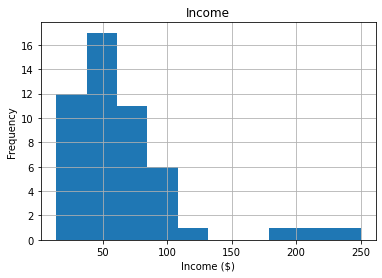

In [ ]:
df.hist()
plt.xlabel('Income ($)')
plt.ylabel('Frequency')

In [ ]:
df.head()

,Income
0,90
1,15
2,85
3,54
4,62


All values are in thousands

In [ ]:
x_bar = df['Income'].mean()
x_bar

63.8

In [ ]:
s = df['Income'].std()
s

45.78387560382064

In [ ]:
# create intervals to then test the frequency
interval_num = (0,20,20,40,40,60,60,80,80,251)

In [ ]:
#observed frequency between each interval
[len(df[(df['Income'] > i) & (df['Income'] < j)]) for i,j in zip(*[iter(interval_num)]*2)]

[6, 10, 13, 10, 11]

Calculate the probability of seeing 20, given the mean and deviation.

In [ ]:
stats.norm.cdf(20, loc=x_bar, scale=s)

0.16936725476477776

Using formula of X - μ / σ

In [ ]:
def calc_prob(actual_value):
  z_score = (actual_value-x_bar)/s
  prob = stats.norm.cdf(z_score)
  return prob

In [ ]:
# how to calculate probability of z score between two values, consider area under curve

In [ ]:
interval_0 = calc_prob(20)
interval_0

0.16936725476477776

In [ ]:
interval_1 = calc_prob(40)-calc_prob(20)
interval_1

0.13222250067226216

In [ ]:
interval_2 = (calc_prob(40)-calc_prob(60))*-1
interval_2

0.16533654993480645

In [ ]:
interval_3 = (calc_prob(60)-calc_prob(80))*-1
interval_3

0.17134293419803698

In [ ]:
interval_4 = 1- calc_prob(80)
interval_4

0.36173076043011665

In [ ]:
all_intervals = [interval_0, interval_1,interval_2,interval_3, interval_4]

In [ ]:
[interval * 50 for interval in all_intervals]

[8.468362738238888,
 6.611125033613108,
 8.266827496740323,
 8.567146709901849,
 18.08653802150583]

In [ ]:
interval_0 = stats.chisquare(f_obs=[6], f_exp=[8.468362738238888])
interval_0

Power_divergenceResult(statistic=0.7194796439238578, pvalue=nan)

In [ ]:
interval_1 = stats.chisquare(f_obs=[10], f_exp=[6.611125033613108])
interval_1

Power_divergenceResult(statistic=1.737143599525491, pvalue=nan)

In [ ]:
interval_2 = stats.chisquare(f_obs=[13], f_exp=[8.266827496740323])
interval_2

Power_divergenceResult(statistic=2.709978157212925, pvalue=nan)

In [ ]:
interval_3 = stats.chisquare(f_obs=[10], f_exp=[8.567146709901849])
interval_3

Power_divergenceResult(statistic=0.23964437874889838, pvalue=nan)

In [ ]:
interval_4 = stats.chisquare(f_obs=[11], f_exp=[18.08653802150583])
interval_4

Power_divergenceResult(statistic=2.7765966638023682, pvalue=nan)

In [ ]:
test_stat = sum([interval_0.statistic, interval_1.statistic, 
                 interval_2.statistic, interval_3.statistic, interval_4.statistic])
test_stat

8.18284244321354

In [ ]:
dof = 2

In [ ]:
# calcualte the test statistic, since it's a right tailed test, we subtract 1
1 - stats.chi2.cdf(test_stat, dof)

0.016715460295705364

This p value is lower than .05. Therefore at the 5% significance level, we reject the null hypothesis, the income of this city does not follow a normal distribution with a mean of \$63,800 and a standard deviation of $45,780

## Jarque Bera

The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.

H<sub>0</sub>
 :  Sample population does not follow a _normal_ distribution with a mean of X and standard deviation of y.

H<sub>A</sub> : Sample population follows a _normal_ distribution with a mean of X and standard deviation of y.



In [ ]:
s = stats.skew(df['Income'])
s

2.2488190268630164

"If bias is False then the kurtosis is calculated using k statistics to eliminate bias coming from biased moment estimators."

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

In [ ]:
k = stats.kurtosis(df['Income'], bias = False)
k

6.732158660542542

In [ ]:
test_stat = (50/6)*(s**2 + k**2/4)
test_stat

136.5639756105051

In [ ]:
1 - stats.chi2.cdf(test_stat, 2)

0.0

p value is 0, at a 1% confidence interval we can reject the null hypothesis that the income does not follow a normal distribution.

In [ ]:
stats.jarque_bera(df['Income'])

(116.14367605756448, 0.0)

Text(0, 0.5, 'Frequency')

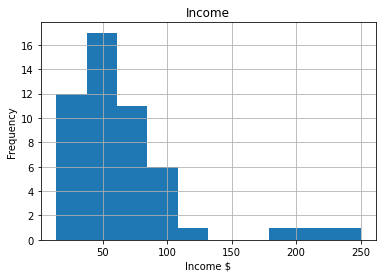

In [ ]:
df['Income'].hist()
plt.title('Income')
plt.xlabel('Income $')
plt.ylabel('Frequency')

Finally, we can see this does not look like a normal distribution :)